In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

## Data Loading

In [4]:
df = pd.read_excel('/content/sample_data/kokam_capacity.xlsx')
df.head()

,Time[h],DataSet,DateTime,t-Step[h],t-Set[h],Line,Command,U[V],I[A],Ah[Ah],Ah-Cyc-Charge-0,Ah-Cyc-Discharge-0,Ah-Step,Ah-Set,Wh[Wh],Cyc-Count,State
0,0.016729,1,17.01.2024 09:25:34,0.000000e+00,0.016729,3,Charge,3.787446,-0.001076,-6.726814e-08,0.000000e+00,6.726814e-08,-6.726814e-08,-6.726814e-08,-2.547745e-07,1,3
1,0.016729,2,17.01.2024 09:25:34,2.779687e-07,0.016729,3,Charge,3.854010,1.697992,4.047205e-07,4.719886e-07,6.726814e-08,4.047205e-07,4.047205e-07,1.564274e-06,1,0
2,0.016752,3,17.01.2024 09:25:34,2.277481e-05,0.016752,3,Charge,3.874036,1.648371,3.737224e-05,3.743951e-05,6.726814e-08,3.737224e-05,3.737224e-05,1.446841e-04,1,1
3,0.025063,4,17.01.2024 09:26:04,8.333409e-03,0.025063,3,Charge,3.891201,1.650007,1.374991e-02,1.374998e-02,6.726814e-08,1.374991e-02,1.374991e-02,5.342843e-02,1,1
4,0.033396,5,17.01.2024 09:26:34,1.666667e-02,0.033396,3,Charge,3.898449,1.649989,2.749978e-02,2.749985e-02,6.726814e-08,2.749978e-02,2.749978e-02,1.069846e-01,1,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1255 entries, 0 to 1254
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Time[h]             1255 non-null   float64
 1   DataSet             1255 non-null   int64  
 2   DateTime            1255 non-null   object 
 3   t-Step[h]           1255 non-null   float64
 4   t-Set[h]            1255 non-null   float64
 5   Line                1255 non-null   int64  
 6   Command             1255 non-null   object 
 7   U[V]                1255 non-null   float64
 8   I[A]                1255 non-null   float64
 9   Ah[Ah]              1255 non-null   float64
 10  Ah-Cyc-Charge-0     1255 non-null   float64
 11  Ah-Cyc-Discharge-0  1255 non-null   float64
 12  Ah-Step             1255 non-null   float64
 13  Ah-Set              1255 non-null   float64
 14  Wh[Wh]              1255 non-null   float64
 15  Cyc-Count           1255 non-null   int64  
 16  State 

In [6]:
df.shape

(1255, 17)

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time[h],1255.0,4.948497,2.862262,1.672919e-02,2.480898,4.959230,7.413489,9.921142
DataSet,1255.0,628.000000,362.431603,1.000000e+00,314.500000,628.000000,941.500000,1255.000000
t-Step[h],1255.0,1.152766,0.999875,0.000000e+00,0.300000,0.783333,1.970833,3.332498
t-Set[h],1255.0,4.948497,2.862262,1.672919e-02,2.480898,4.959230,7.413489,9.921142
Line,1255.0,7.078088,2.342375,3.000000e+00,6.000000,6.000000,8.000000,12.000000
U[V],1255.0,3.824348,0.317796,2.699161e+00,3.665190,3.884144,4.059041,4.200178
I[A],1255.0,0.005324,1.077683,-1.650052e+00,-0.989999,0.181653,0.989999,1.697992
Ah[Ah],1255.0,0.267391,1.045364,-1.655710e+00,-0.587748,0.406790,1.210436,1.643464
Ah-Cyc-Charge-0,1255.0,2.566711,1.424497,0.000000e+00,1.643464,1.643464,3.908089,4.939264
Ah-Cyc-Discharge-0,1255.0,2.299320,1.443815,6.726814e-08,0.845625,3.299174,3.299174,4.949178


In [8]:
df.isnull().sum()

,0
Time[h],0
DataSet,0
DateTime,0
t-Step[h],0
t-Set[h],0
Line,0
Command,0
U[V],0
I[A],0
Ah[Ah],0


## Data cleaning and Visualisation

In [9]:
df.columns

Index(['Time[h]', 'DataSet', 'DateTime', 't-Step[h]', 't-Set[h]', 'Line',
       'Command', 'U[V]', 'I[A]', 'Ah[Ah]', 'Ah-Cyc-Charge-0',
       'Ah-Cyc-Discharge-0', 'Ah-Step', 'Ah-Set', 'Wh[Wh]', 'Cyc-Count',
       'State'],
      dtype='object')

In [10]:
train_df = df[['Time[h]', 't-Step[h]', 'U[V]' ,'I[A]', 'Ah[Ah]', 'Command']]
train_df.head()

,Time[h],t-Step[h],U[V],I[A],Ah[Ah],Command
0,0.016729,0.000000e+00,3.787446,-0.001076,-6.726814e-08,Charge
1,0.016729,2.779687e-07,3.854010,1.697992,4.047205e-07,Charge
2,0.016752,2.277481e-05,3.874036,1.648371,3.737224e-05,Charge
3,0.025063,8.333409e-03,3.891201,1.650007,1.374991e-02,Charge
4,0.033396,1.666667e-02,3.898449,1.649989,2.749978e-02,Charge


In [11]:
train_df = train_df.drop(columns='t-Step[h]')

In [12]:
train_df.columns

Index(['Time[h]', 'U[V]', 'I[A]', 'Ah[Ah]', 'Command'], dtype='object')

<Axes: xlabel='Command'>

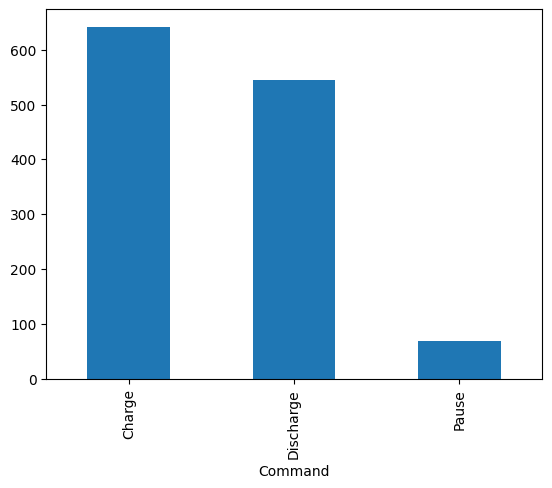

In [13]:
train_df['Command'].value_counts().plot(kind='bar')

<Axes: xlabel='Time[h]', ylabel='Ah[Ah]'>

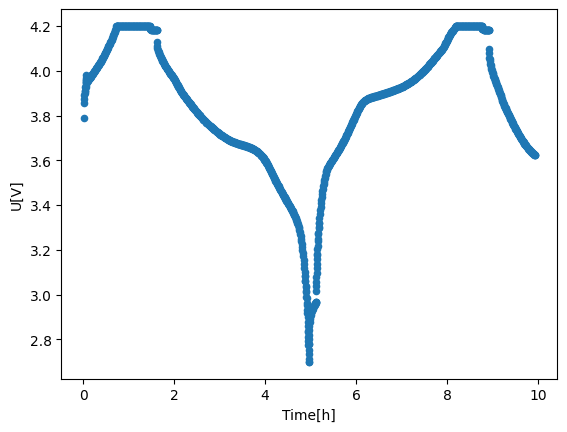

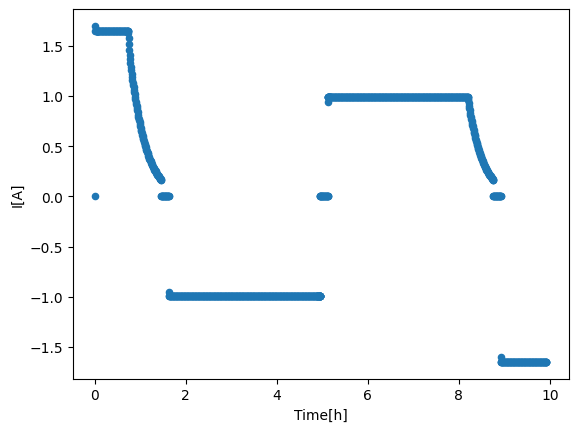

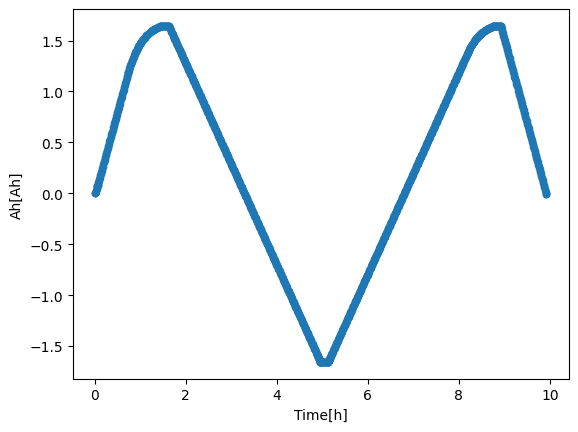

In [14]:
train_df.plot(x='Time[h]', y='U[V]', kind='scatter')
train_df.plot(x='Time[h]', y='I[A]', kind='scatter')
train_df.plot(x='Time[h]', y='Ah[Ah]', kind='scatter')

## Feature Engineering

In [15]:
def compute_battery_features(df, nominal_capacity):
    """
    Compute additional battery features for a given dataframe.

    Parameters:
    df (pd.DataFrame): The input dataframe containing the columns ['Time[h]', 'U[V]', 'I[A]', 'Ah[Ah]', 'Command']
    nominal_capacity (float): The nominal capacity of the battery in Ah (Ampere-hours).

    Returns:
    pd.DataFrame: The dataframe with new features added.
    """

    # Create a copy of the dataframe to avoid modifying the original one
    df = df.copy()

    # Calculate Power (W)
    df['Power[W]'] = df['U[V]'] * df['I[A]']

    # Calculate Energy (Wh) - assuming time is cumulative in hours
    df['Energy[Wh]'] = df['Power[W]'] * df['Time[h]']

    # Calculate State of Charge (SOC) - assuming the initial SOC is 100%
    df['SOC[%]'] = 100 * (df['Ah[Ah]'] / nominal_capacity)

    # Calculate Internal Resistance (R)
    df['Internal_Resistance[Ω]'] = df['U[V]'].diff() / df['I[A]'].diff()

    # Calculate Voltage Drop (ΔU)
    df['Voltage_Drop[V]'] = df['U[V]'].diff()

    # Calculate C-Rate
    df['C-Rate'] = df['I[A]'] / nominal_capacity

    # Calculate Charge Throughput
    df['Charge_Throughput[Ah]'] = df['I[A]'].cumsum() * df['Time[h]'].diff().fillna(0)

    # Calculate Energy Cumulative (Wh)
    df['Cumulative_Energy[Wh]'] = df['Energy[Wh]'].cumsum()

    # Calculate Entropy Change (dS/dT) - this requires temperature data, assuming a placeholder
    # df['Entropy_Change[dS/dT]'] = ... (This requires temperature data)

    # Calculate Cycle Count Normalized - if cycle count is available
    # df['Cycle_Count_Normalized'] = (df['Cycle_Count'] / nominal_cycle_life) * 100

    # Calculate Voltage Difference Over Time (dU/dt)
    df['dU/dt[V/h]'] = df['U[V]'].diff() / df['Time[h]'].diff()

    # Fill NaN values generated by diff() with 0 or appropriate method
    df.fillna(0, inplace=True)

    return df

nominal_capacity = 3.3  # Nominal capacity of the battery in Ah
train_df = compute_battery_features(train_df, nominal_capacity)
train_df.head()

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


,Time[h],U[V],I[A],Ah[Ah],Command,Power[W],Energy[Wh],SOC[%],Internal_Resistance[Ω],Voltage_Drop[V],C-Rate,Charge_Throughput[Ah],Cumulative_Energy[Wh],dU/dt[V/h]
0,0.016729,3.787446,-0.001076,-6.726814e-08,Charge,-0.004077,-0.000068,-0.000002,0.000000,0.000000,-0.000326,-0.000000e+00,-0.000068,0.000000
1,0.016729,3.854010,1.697992,4.047205e-07,Charge,6.544078,0.109479,0.000012,0.039176,0.066564,0.514543,4.716894e-07,0.109411,239464.158120
2,0.016752,3.874036,1.648371,3.737224e-05,Charge,6.385847,0.106976,0.001132,-0.403582,0.020026,0.499506,7.525836e-05,0.216386,890.181904
3,0.025063,3.891201,1.650007,1.374991e-02,Charge,6.420510,0.160915,0.416664,10.488814,0.017165,0.500002,4.151406e-02,0.377301,2.065472
4,0.033396,3.898449,1.649989,2.749978e-02,Charge,6.432399,0.214815,0.833327,-403.854052,0.007248,0.499997,5.537685e-02,0.592116,0.869721


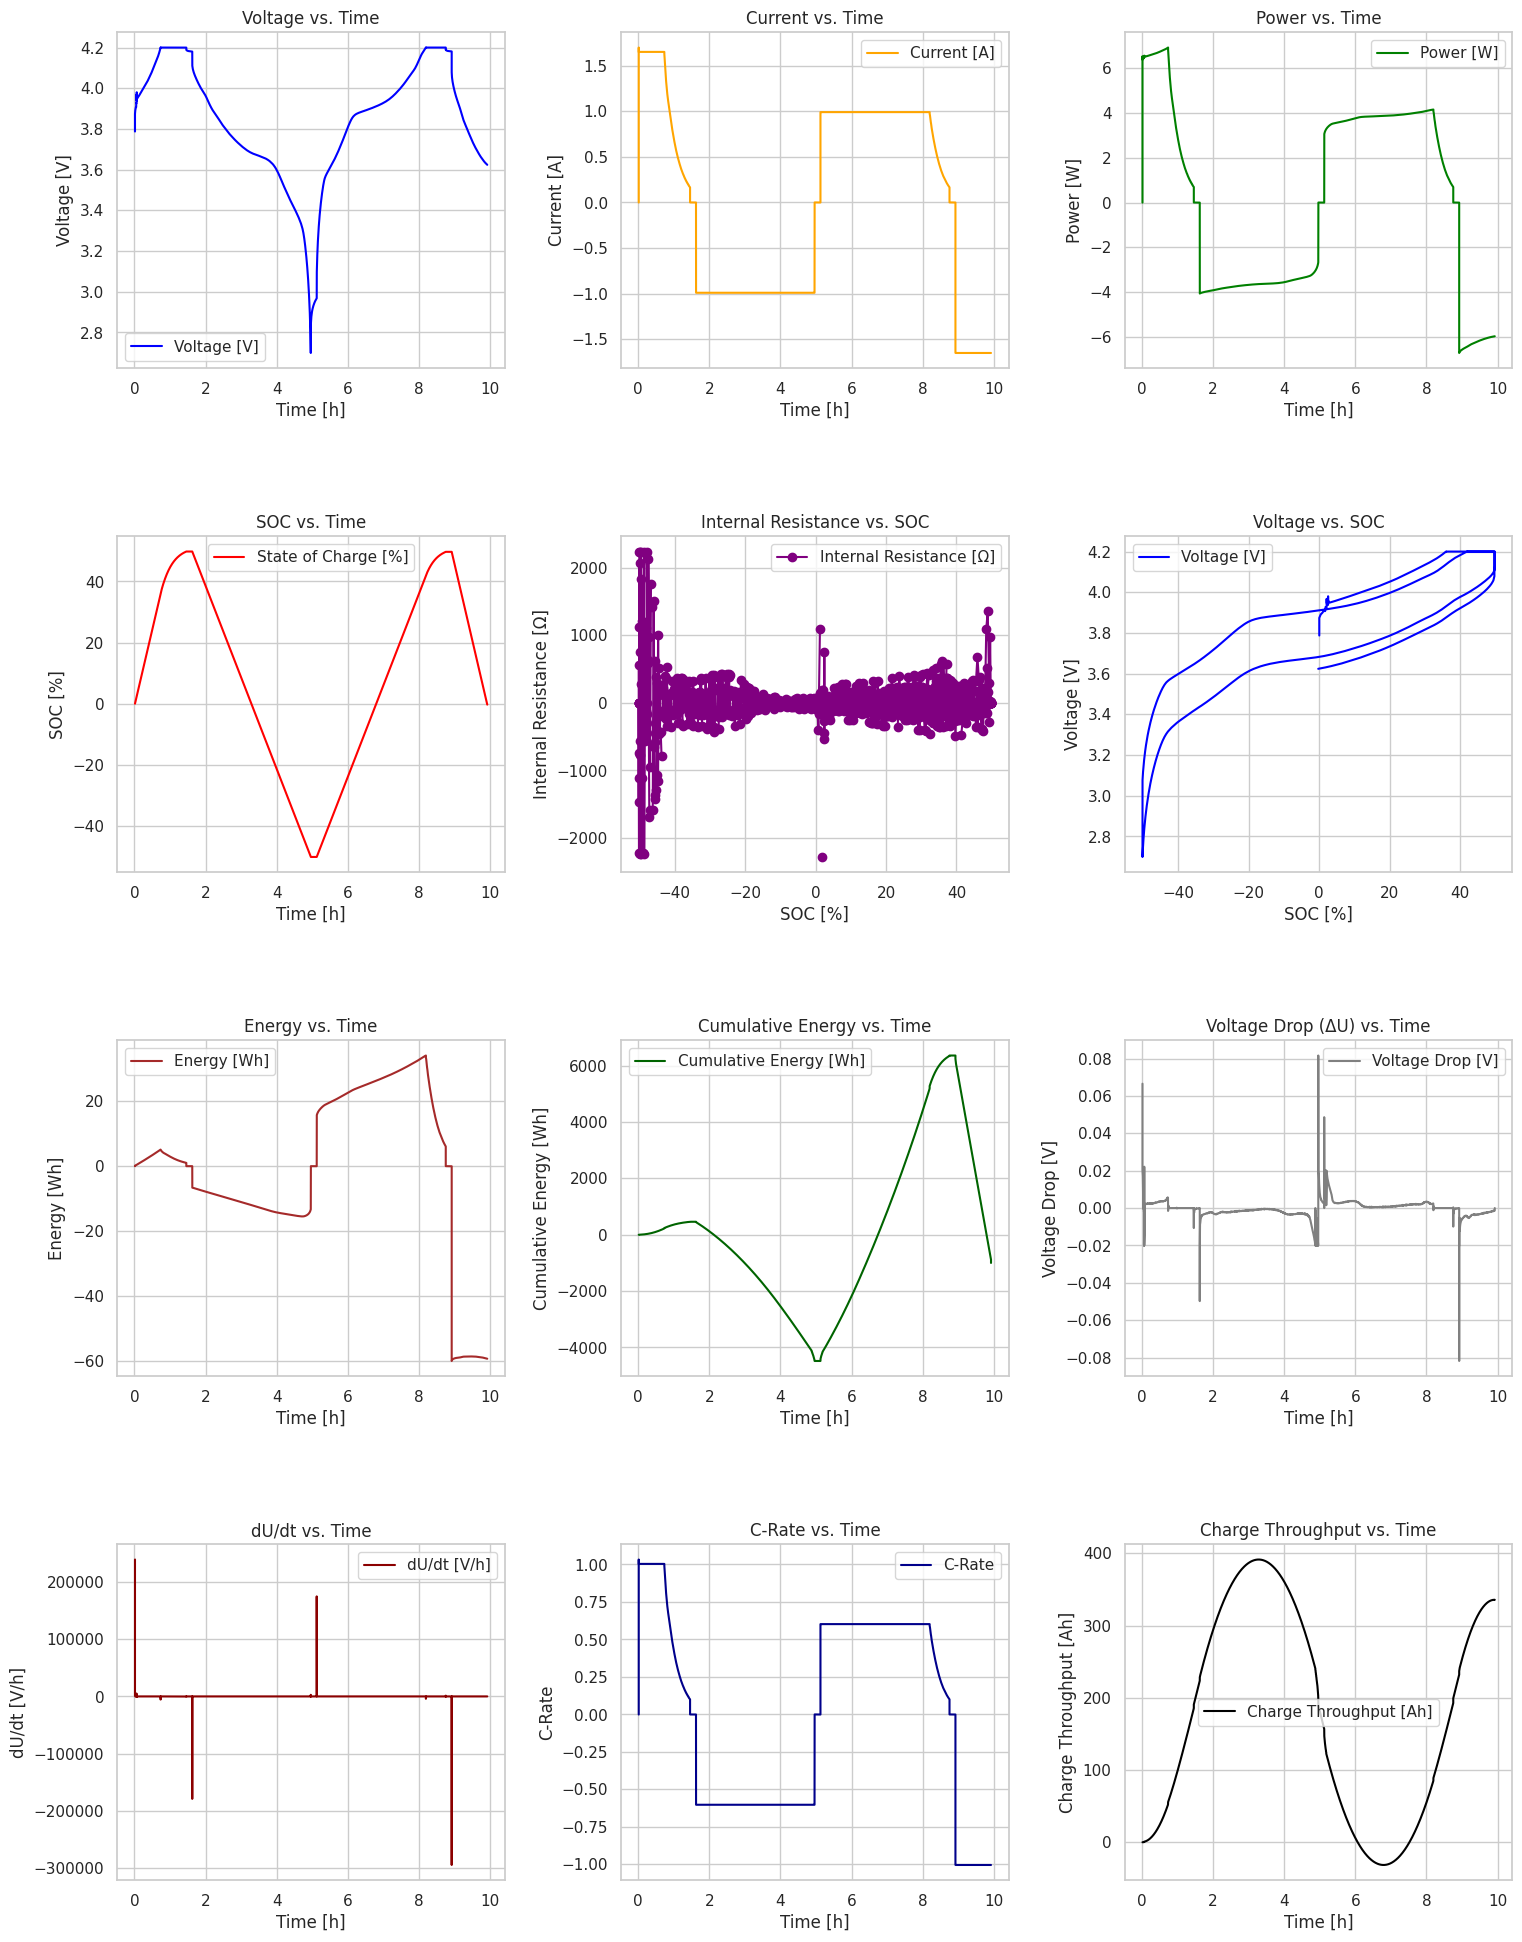

In [16]:
# Let's plot to see the features better

# Set the style
sns.set(style="whitegrid")

# Create a figure with subplots
fig, axes = plt.subplots(4, 3, figsize=(18, 24))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

# 1. Voltage vs. Time
axes[0, 0].plot(train_df['Time[h]'], train_df['U[V]'], label='Voltage [V]', color='blue')
axes[0, 0].set_title('Voltage vs. Time')
axes[0, 0].set_xlabel('Time [h]')
axes[0, 0].set_ylabel('Voltage [V]')
axes[0, 0].legend()

# 2. Current vs. Time
axes[0, 1].plot(train_df['Time[h]'], train_df['I[A]'], label='Current [A]', color='orange')
axes[0, 1].set_title('Current vs. Time')
axes[0, 1].set_xlabel('Time [h]')
axes[0, 1].set_ylabel('Current [A]')
axes[0, 1].legend()

# 3. Power vs. Time
axes[0, 2].plot(train_df['Time[h]'], train_df['Power[W]'], label='Power [W]', color='green')
axes[0, 2].set_title('Power vs. Time')
axes[0, 2].set_xlabel('Time [h]')
axes[0, 2].set_ylabel('Power [W]')
axes[0, 2].legend()

# 4. SOC vs. Time
axes[1, 0].plot(train_df['Time[h]'], train_df['SOC[%]'], label='State of Charge [%]', color='red')
axes[1, 0].set_title('SOC vs. Time')
axes[1, 0].set_xlabel('Time [h]')
axes[1, 0].set_ylabel('SOC [%]')
axes[1, 0].legend()

# 5. Internal Resistance vs. SOC
axes[1, 1].plot(train_df['SOC[%]'], train_df['Internal_Resistance[Ω]'], 'o-', label='Internal Resistance [Ω]', color='purple')
axes[1, 1].set_title('Internal Resistance vs. SOC')
axes[1, 1].set_xlabel('SOC [%]')
axes[1, 1].set_ylabel('Internal Resistance [Ω]')
axes[1, 1].legend()

# 6. Voltage vs. SOC
axes[1, 2].plot(train_df['SOC[%]'], train_df['U[V]'], label='Voltage [V]', color='blue')
axes[1, 2].set_title('Voltage vs. SOC')
axes[1, 2].set_xlabel('SOC [%]')
axes[1, 2].set_ylabel('Voltage [V]')
axes[1, 2].legend()

# 7. Energy vs. Time
axes[2, 0].plot(train_df['Time[h]'], train_df['Energy[Wh]'], label='Energy [Wh]', color='brown')
axes[2, 0].set_title('Energy vs. Time')
axes[2, 0].set_xlabel('Time [h]')
axes[2, 0].set_ylabel('Energy [Wh]')
axes[2, 0].legend()

# 8. Cumulative Energy vs. Time
train_df['Cumulative_Energy[Wh]'] = train_df['Energy[Wh]'].cumsum()  # Cumulative sum
axes[2, 1].plot(train_df['Time[h]'], train_df['Cumulative_Energy[Wh]'], label='Cumulative Energy [Wh]', color='darkgreen')
axes[2, 1].set_title('Cumulative Energy vs. Time')
axes[2, 1].set_xlabel('Time [h]')
axes[2, 1].set_ylabel('Cumulative Energy [Wh]')
axes[2, 1].legend()

# 9. Voltage Drop (ΔU) vs. Time
train_df['Voltage_Drop[V]'] = train_df['U[V]'].diff()  # Difference in voltage
axes[2, 2].plot(train_df['Time[h]'], train_df['Voltage_Drop[V]'], label='Voltage Drop [V]', color='grey')
axes[2, 2].set_title('Voltage Drop (ΔU) vs. Time')
axes[2, 2].set_xlabel('Time [h]')
axes[2, 2].set_ylabel('Voltage Drop [V]')
axes[2, 2].legend()

# 10. dU/dt vs. Time
train_df['dU/dt[V/h]'] = train_df['U[V]'].diff() / train_df['Time[h]'].diff()  # Rate of change of voltage
axes[3, 0].plot(train_df['Time[h]'], train_df['dU/dt[V/h]'], label='dU/dt [V/h]', color='darkred')
axes[3, 0].set_title('dU/dt vs. Time')
axes[3, 0].set_xlabel('Time [h]')
axes[3, 0].set_ylabel('dU/dt [V/h]')
axes[3, 0].legend()

# 11. C-Rate vs. Time
train_df['C-Rate'] = train_df['I[A]'] / train_df['Ah[Ah]'].max()  # Assuming max Ah as nominal capacity
axes[3, 1].plot(train_df['Time[h]'], train_df['C-Rate'], label='C-Rate', color='darkblue')
axes[3, 1].set_title('C-Rate vs. Time')
axes[3, 1].set_xlabel('Time [h]')
axes[3, 1].set_ylabel('C-Rate')
axes[3, 1].legend()

# 12. Charge Throughput vs. Time
train_df['Charge_Throughput[Ah]'] = train_df['Ah[Ah]'].cumsum()  # Cumulative sum of charge
axes[3, 2].plot(train_df['Time[h]'], train_df['Charge_Throughput[Ah]'], label='Charge Throughput [Ah]', color='black')
axes[3, 2].set_title('Charge Throughput vs. Time')
axes[3, 2].set_xlabel('Time [h]')
axes[3, 2].set_ylabel('Charge Throughput [Ah]')
axes[3, 2].legend()

# Show the plots
plt.show()


## Preapring the model for Machine Learning

In [17]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the 'Command' column
train_df['Command_encoded'] = label_encoder.fit_transform(train_df['Command'])

In [18]:
train_df.isnull().sum()

,0
Time[h],0
U[V],0
I[A],0
Ah[Ah],0
Command,0
Power[W],0
Energy[Wh],0
SOC[%],0
Internal_Resistance[Ω],0
Voltage_Drop[V],1


In [19]:
train_df.fillna(0, inplace=True)

In [20]:
train_df.columns

Index(['Time[h]', 'U[V]', 'I[A]', 'Ah[Ah]', 'Command', 'Power[W]',
       'Energy[Wh]', 'SOC[%]', 'Internal_Resistance[Ω]', 'Voltage_Drop[V]',
       'C-Rate', 'Charge_Throughput[Ah]', 'Cumulative_Energy[Wh]',
       'dU/dt[V/h]', 'Command_encoded'],
      dtype='object')

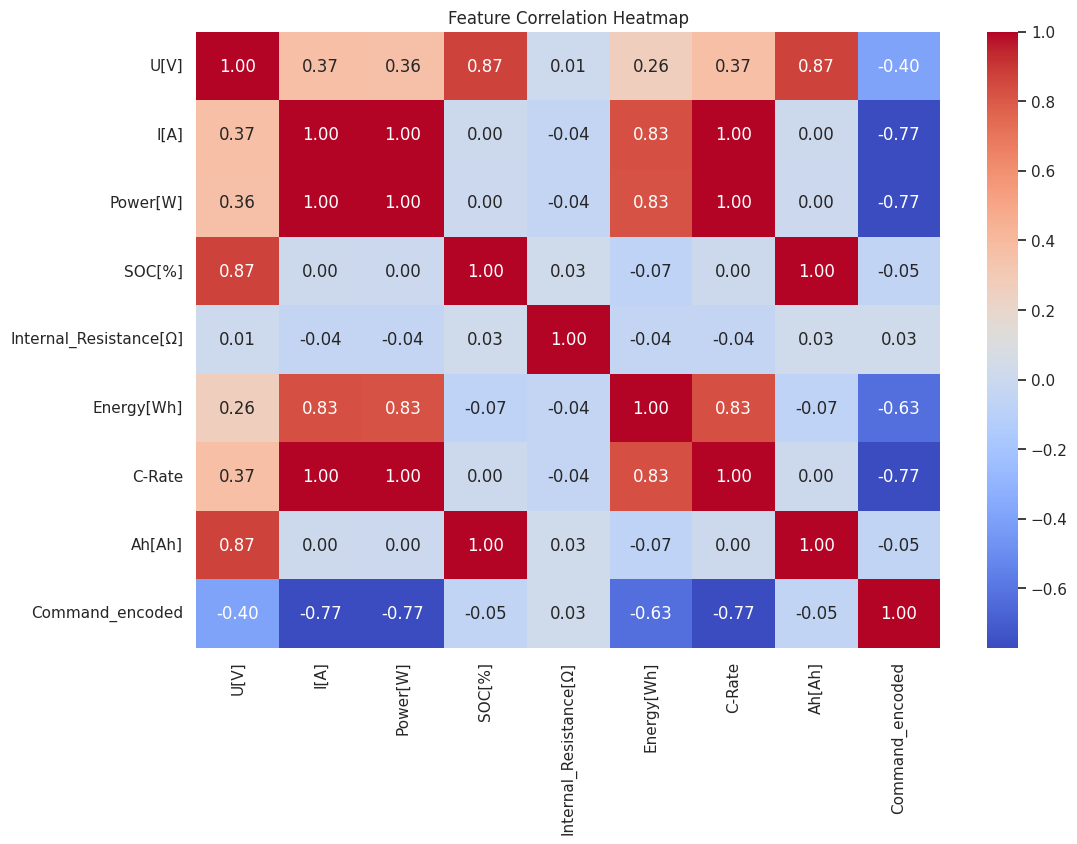

In [21]:
# Correlation Matrix
plt.figure(figsize=(12, 8))
corr = train_df[['U[V]', 'I[A]', 'Power[W]', 'SOC[%]', 'Internal_Resistance[Ω]', 'Energy[Wh]', 'C-Rate', 'Ah[Ah]','Command_encoded' ]].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Heatmap')
plt.show()


In [22]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Replace infinite values with NaNs
train_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Select only numeric columns for median imputation
numeric_columns = train_df.select_dtypes(include=np.number).columns
train_df[numeric_columns] = train_df[numeric_columns].fillna(train_df[numeric_columns].median())

# Define the target and features
X_train = train_df[['Time[h]', 'U[V]', 'I[A]', 'Power[W]', 'Energy[Wh]',  'Internal_Resistance[Ω]',  'Command_encoded' ]]
y_train = train_df['Ah[Ah]']  # Target variable

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [23]:
test_df = pd.read_excel('/content/sample_data/Kokam_OCV.xlsx')
test_df = compute_battery_features(test_df, nominal_capacity)
test_df.head()

/usr/local/lib/python3.10/dist-packages/numpy/core/_methods.py:49: RuntimeWarning: invalid value encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)


,Time[h],DataSet,t-Step[h],time(sec),Command,U[V],I[A],Ah[Ah],Power[W],Energy[Wh],SOC[%],Internal_Resistance[Ω],Voltage_Drop[V],C-Rate,Charge_Throughput[Ah],Cumulative_Energy[Wh],dU/dt[V/h]
0,1.593852,199,1.666667e-01,599.999999,Pause,4.181487,0.000000,1.652556,0.000000,0.000000,50.077467,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
1,1.593945,200,0.000000e+00,0.000000,Discharge,4.181106,-0.001076,1.652556,-0.004501,-0.007174,50.077465,0.354349,-0.000381,-0.000326,-9.983711e-08,-0.007174,-4.112997
2,1.593945,201,2.777359e-07,0.001000,Discharge,4.104052,-1.603081,1.652556,-6.579128,-10.486767,50.077451,0.048098,-0.077053,-0.485782,-4.455321e-07,-10.493942,-277434.422881
3,1.593946,202,1.110943e-06,0.003999,Discharge,4.094134,-1.646679,1.652555,-6.741725,-10.745944,50.077410,0.227482,-0.009918,-0.498994,-2.708622e-06,-21.239886,-11903.126905
4,1.593961,203,1.610868e-05,0.057991,Discharge,4.084216,-1.649227,1.652530,-6.735799,-10.736600,50.076661,3.892816,-0.009918,-0.499766,-7.348986e-05,-31.976485,-661.284829


In [24]:
test_df['Command_encoded'] = label_encoder.fit_transform(test_df['Command'])

In [25]:
# Replace infinite values with NaNs
test_df.replace([np.inf, -np.inf], np.nan, inplace=True)

# Select only numeric columns for median imputation
numeric_columns = test_df.select_dtypes(include=np.number).columns
test_df[numeric_columns] = test_df[numeric_columns].fillna(test_df[numeric_columns].median())

# Define the target and features
X_test = test_df[['Time[h]', 'U[V]', 'I[A]', 'Power[W]', 'Energy[Wh]',  'Internal_Resistance[Ω]',  'Command_encoded']]
y_test = test_df['Ah[Ah]']  # Target variable

# Standardize the features
scaler = StandardScaler()
X_test_scaled = scaler.fit_transform(X_test)

# Select and Train Machine Learning Model

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Initialize models
lr_model = LinearRegression()
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
gbr_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
svr_model = SVR()
knn_model = KNeighborsRegressor()

# Train models
lr_model.fit(X_train_scaled, y_train)
rf_model.fit(X_train_scaled, y_train)
gbr_model.fit(X_train_scaled, y_train)
svr_model.fit(X_train_scaled, y_train)
knn_model.fit(X_train_scaled, y_train)

# Predict on the test set
lr_predictions = lr_model.predict(X_test_scaled)
rf_predictions = rf_model.predict(X_test_scaled)
gbr_predictions = gbr_model.predict(X_test_scaled)
svr_predictions = svr_model.predict(X_test_scaled)
knn_predictions = knn_model.predict(X_test_scaled)

# Evaluate models
lr_mae = mean_absolute_error(y_test, lr_predictions)
rf_mae = mean_absolute_error(y_test, rf_predictions)
gbr_mae = mean_absolute_error(y_test, gbr_predictions)
svr_mae = mean_absolute_error(y_test, svr_predictions)
knn_mae = mean_absolute_error(y_test, knn_predictions)

lr_mse = mean_squared_error(y_test, lr_predictions)
rf_mse = mean_squared_error(y_test, rf_predictions)
gbr_mse = mean_squared_error(y_test, gbr_predictions)
svr_mse = mean_squared_error(y_test, svr_predictions)
knn_mse = mean_squared_error(y_test, knn_predictions)

# Print evaluation results
print(f"Linear Regression MAE: {lr_mae:.3f}, MSE: {lr_mse:.3f}")
print(f"Random Forest MAE: {rf_mae:.3f}, MSE: {rf_mse:.3f}")
print(f"Gradient Boosting MAE: {gbr_mae:.3f}, MSE: {gbr_mse:.3f}")
print(f"Support Vector Regressor MAE: {svr_mae:.3f}, MSE: {svr_mse:.3f}")
print(f"K-Nearest Neighbors MAE: {knn_mae:.3f}, MSE: {knn_mse:.3f}")

Linear Regression MAE: 0.535, MSE: 0.414
Random Forest MAE: 0.355, MSE: 0.329
Gradient Boosting MAE: 0.373, MSE: 0.299
Support Vector Regressor MAE: 0.427, MSE: 0.350
K-Nearest Neighbors MAE: 0.633, MSE: 0.991


**Model Performance:**

- Best Performing Models: Gradient Boosting Regressor and Random Forest Regressor have the lowest MAE and MSE, indicating better performance compared to others.
- Least Performing Model: Support Vector Regressor (SVR) has higher MAE and MSE, suggesting it might not be the best fit for this dataset with default parameters.

In [27]:
from sklearn.model_selection import GridSearchCV

# Hyperparameters for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

rf_grid_search = GridSearchCV(estimator=rf_model, param_grid=rf_param_grid, cv=5, n_jobs=-1, verbose=2)
rf_grid_search.fit(X_train_scaled, y_train)
print(f"Best parameters for Random Forest: {rf_grid_search.best_params_}")

# Hyperparameters for Gradient Boosting
gbr_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5]
}

gbr_grid_search = GridSearchCV(estimator=gbr_model, param_grid=gbr_param_grid, cv=5, n_jobs=-1, verbose=2)
gbr_grid_search.fit(X_train_scaled, y_train)
print(f"Best parameters for Gradient Boosting: {gbr_grid_search.best_params_}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters for Random Forest: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best parameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 200}


In [28]:
# Reinitialize the models with best parameters
rf_optimized = RandomForestRegressor(
    n_estimators=300,
    max_depth=10,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42
)

gbr_optimized = GradientBoostingRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

# Retrain the models
rf_optimized.fit(X_train_scaled, y_train)
gbr_optimized.fit(X_train_scaled, y_train)

GradientBoostingRegressor(random_state=42)

In [29]:
# Predict on the test set with optimized models
rf_optimized_predictions = rf_optimized.predict(X_test_scaled)
gbr_optimized_predictions = gbr_optimized.predict(X_test_scaled)

# Evaluate optimized models
rf_optimized_mae = mean_absolute_error(y_test, rf_optimized_predictions)
gbr_optimized_mae = mean_absolute_error(y_test, gbr_optimized_predictions)

rf_optimized_mse = mean_squared_error(y_test, rf_optimized_predictions)
gbr_optimized_mse = mean_squared_error(y_test, gbr_optimized_predictions)

# Print evaluation results
print(f"Optimized Random Forest MAE: {rf_optimized_mae:.3f}, MSE: {rf_optimized_mse:.3f}")
print(f"Optimized Gradient Boosting MAE: {gbr_optimized_mae:.3f}, MSE: {gbr_optimized_mse:.3f}")

Optimized Random Forest MAE: 0.349, MSE: 0.326
Optimized Gradient Boosting MAE: 0.373, MSE: 0.299


In [30]:
# Print the comparison results
print(f"Initial Random Forest MAE: {rf_mae:.3f}, MSE: {rf_mse:.3f}")
print(f"Optimized Random Forest MAE: {rf_optimized_mae:.3f}, MSE: {rf_optimized_mse:.3f}")

print(f"Initial Gradient Boosting MAE: {gbr_mae:.3f}, MSE: {gbr_mse:.3f}")
print(f"Optimized Gradient Boosting MAE: {gbr_optimized_mae:.3f}, MSE: {gbr_optimized_mse:.3f}")


Initial Random Forest MAE: 0.355, MSE: 0.329
Optimized Random Forest MAE: 0.349, MSE: 0.326
Initial Gradient Boosting MAE: 0.373, MSE: 0.299
Optimized Gradient Boosting MAE: 0.373, MSE: 0.299


In [31]:
from sklearn.model_selection import cross_val_score

# Cross-validate the optimized models
rf_cv_scores = cross_val_score(rf_optimized, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')
gbr_cv_scores = cross_val_score(gbr_optimized, X_train_scaled, y_train, cv=5, scoring='neg_mean_squared_error')

print(f"Optimized Random Forest CV MSE: {-rf_cv_scores.mean():.3f}, Std: {rf_cv_scores.std():.3f}")
print(f"Optimized Gradient Boosting CV MSE: {-gbr_cv_scores.mean():.3f}, Std: {gbr_cv_scores.std():.3f}")

Optimized Random Forest CV MSE: 0.403, Std: 0.189
Optimized Gradient Boosting CV MSE: 0.491, Std: 0.168


In [32]:
# Final evaluation on the test set
final_gbr_predictions = gbr_optimized.predict(X_test_scaled)
final_rf_predictions = rf_optimized.predict(X_test_scaled)

# Compute metrics for the test set
final_gbr_mae = mean_absolute_error(y_test, final_gbr_predictions)
final_rf_mae = mean_absolute_error(y_test, final_rf_predictions)

final_gbr_mse = mean_squared_error(y_test, final_gbr_predictions)
final_rf_mse = mean_squared_error(y_test, final_rf_predictions)

print(f"Final Optimized Gradient Boosting MAE: {final_gbr_mae:.3f}, MSE: {final_gbr_mse:.3f}")
print(f"Final Optimized Random Forest MAE: {final_rf_mae:.3f}, MSE: {final_rf_mse:.3f}")


Final Optimized Gradient Boosting MAE: 0.373, MSE: 0.299
Final Optimized Random Forest MAE: 0.349, MSE: 0.326


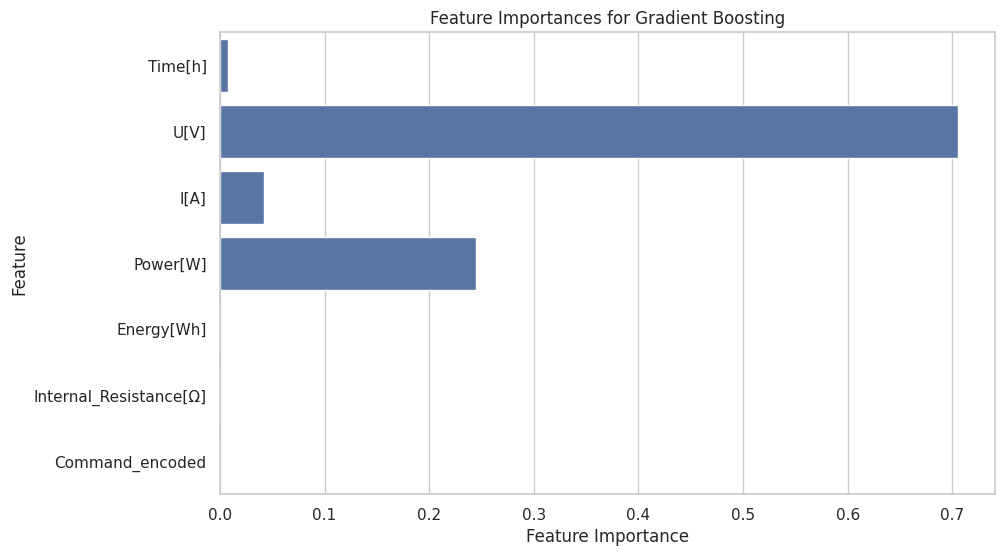

In [33]:
importances = gbr_optimized.feature_importances_
# Assuming 'X_train' is the original DataFrame before scaling
feature_names = X_train.columns  # Access column names from the DataFrame

# Plot feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=feature_names)
plt.title('Feature Importances for Gradient Boosting')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

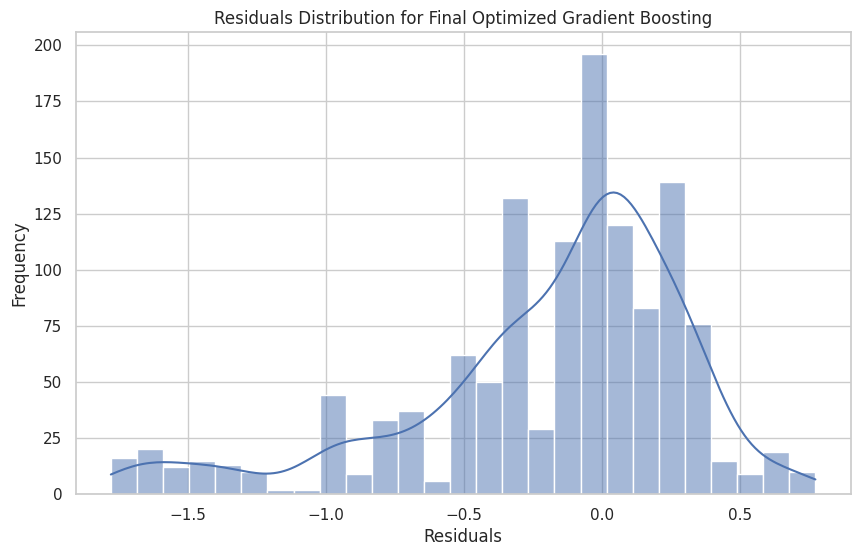

In [34]:
gbr_residuals = y_test - final_gbr_predictions

# Plot residuals
plt.figure(figsize=(10, 6))
sns.histplot(gbr_residuals, kde=True)
plt.title('Residuals Distribution for Final Optimized Gradient Boosting')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()


In [38]:
test_prediction = gbr_optimized.predict(X_test_scaled).flatten()
test_results = pd.DataFrame(data = {'Test Predictions': test_prediction, 'Actuals': y_test, 'error % ': (y_test - test_prediction)/y_test *100 })
test_results

,Test Predictions,Actuals,error %
0,1.223706,1.652556,25.950748
1,1.214767,1.652556,26.491630
2,1.377973,1.652556,16.615621
3,1.377973,1.652555,16.615552
4,1.377973,1.652530,16.614305
...,...,...,...
1267,1.243650,-0.012140,10344.350501
1268,1.243650,0.001610,-77138.654802
1269,1.243650,0.015360,-7996.605688
1270,1.243650,0.015362,-7995.639774


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

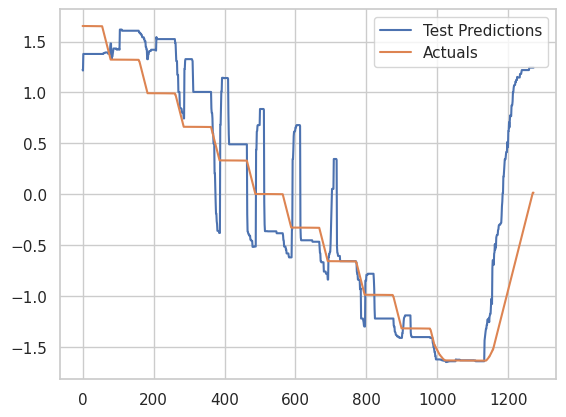

In [36]:
plt.plot(test_results['Test Predictions'])
plt.plot(test_results['Actuals'])
plt.legend(['Test Predictions', 'Actuals'])
plt